In [1]:
# Import required libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

#  Display plots inline within the Jupyter Notebook 
%matplotlib inline 
matplotlib.rcParams["figure.figsize"]=(12,8)

In [2]:
# Read csv file and explore data
df=pd.read_csv("owid-covid-data.csv")
df.head(5)

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests
0,AFG,Asia,Afghanistan,1/5/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/6/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/7/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/8/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/9/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Percentage of NULL present in data
for col in  df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

iso_code - 0.0%
continent - 0.0479570150124496%
location - 0.0%
date - 0.0%
population - 0.0%
total_cases - 0.10165699521810245%
new_cases - 0.028795566066238138%
new_cases_smoothed - 0.03199912488149437%
total_deaths - 0.15932105389271464%
new_deaths - 0.02802723285444904%
new_deaths_smoothed - 0.03123079166970527%
total_cases_per_million - 0.10165699521810245%
new_cases_per_million - 0.028795566066238138%
new_cases_smoothed_per_million - 0.03199912488149437%
total_deaths_per_million - 0.15932105389271464%
new_deaths_per_million - 0.02802723285444904%
new_deaths_smoothed_per_million - 0.03123079166970527%
reproduction_rate - 0.5186405450738121%
icu_patients - 0.8994681571462803%
icu_patients_per_million - 0.8994681571462803%
hosp_patients - 0.8954910560805109%
hosp_patients_per_million - 0.8954910560805109%
weekly_icu_admissions - 0.9722097784074927%
weekly_icu_admissions_per_million - 0.9722097784074927%
weekly_hosp_admissions - 0.9371555523143759%
weekly_hosp_admissions_per_million 

In [4]:

df["date"]=pd.to_datetime(df["date"])
df["year"]=df["date"].dt.year
df['iso_code'] = df['iso_code'].astype(str)
df['continent'] = df['continent'].astype(str)
df['location'] = df['location'].astype(str)
df.dtypes

iso_code                                      object
continent                                     object
location                                      object
date                                  datetime64[ns]
population                                     int64
total_cases                                  float64
new_cases                                    float64
new_cases_smoothed                           float64
total_deaths                                 float64
new_deaths                                   float64
new_deaths_smoothed                          float64
total_cases_per_million                      float64
new_cases_per_million                        float64
new_cases_smoothed_per_million               float64
total_deaths_per_million                     float64
new_deaths_per_million                       float64
new_deaths_smoothed_per_million              float64
reproduction_rate                            float64
icu_patients                                 f

In [5]:
df.sort_values(by="total_deaths",inplace=False,ascending=False)


,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,year
379366,OWID_WRL,nan,World,2024-03-03,7975105024,774834237.0,61949.0,8849.857,7037007.0,1119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
379359,OWID_WRL,nan,World,2024-02-25,7975105024,774772288.0,70088.0,10012.571,7035888.0,1389.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
379365,OWID_WRL,nan,World,2024-03-02,7975105024,774772288.0,0.0,10012.571,7035888.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
379364,OWID_WRL,nan,World,2024-03-01,7975105024,774772288.0,0.0,10012.571,7035888.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
379363,OWID_WRL,nan,World,2024-02-29,7975105024,774772288.0,0.0,10012.571,7035888.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382486,ZWE,Africa,Zimbabwe,2020-03-03,16320539,NaN,0.0,0.000,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
382487,ZWE,Africa,Zimbabwe,2020-03-04,16320539,NaN,0.0,0.000,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
382488,ZWE,Africa,Zimbabwe,2020-03-05,16320539,NaN,0.0,0.000,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
382489,ZWE,Africa,Zimbabwe,2020-03-06,16320539,NaN,0.0,0.000,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020


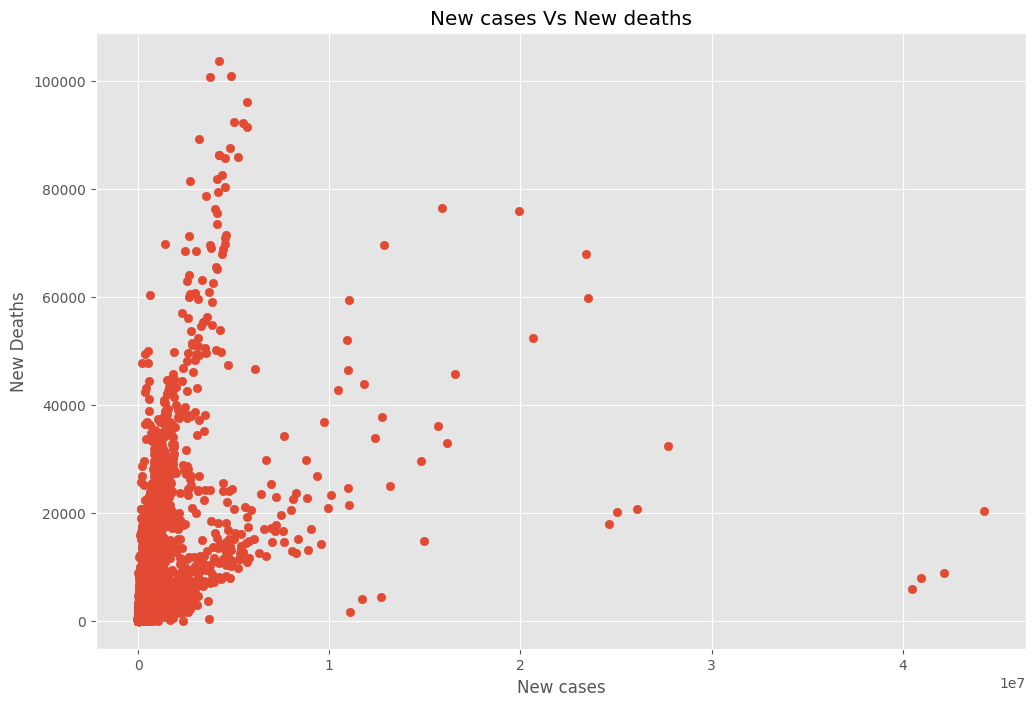

In [6]:
# Total number of deaths based on population
plt.scatter(x=df["new_cases"],y=df["new_deaths"])
plt.title("New cases Vs New deaths")
plt.xlabel("New cases")
plt.ylabel("New Deaths")
plt.show()

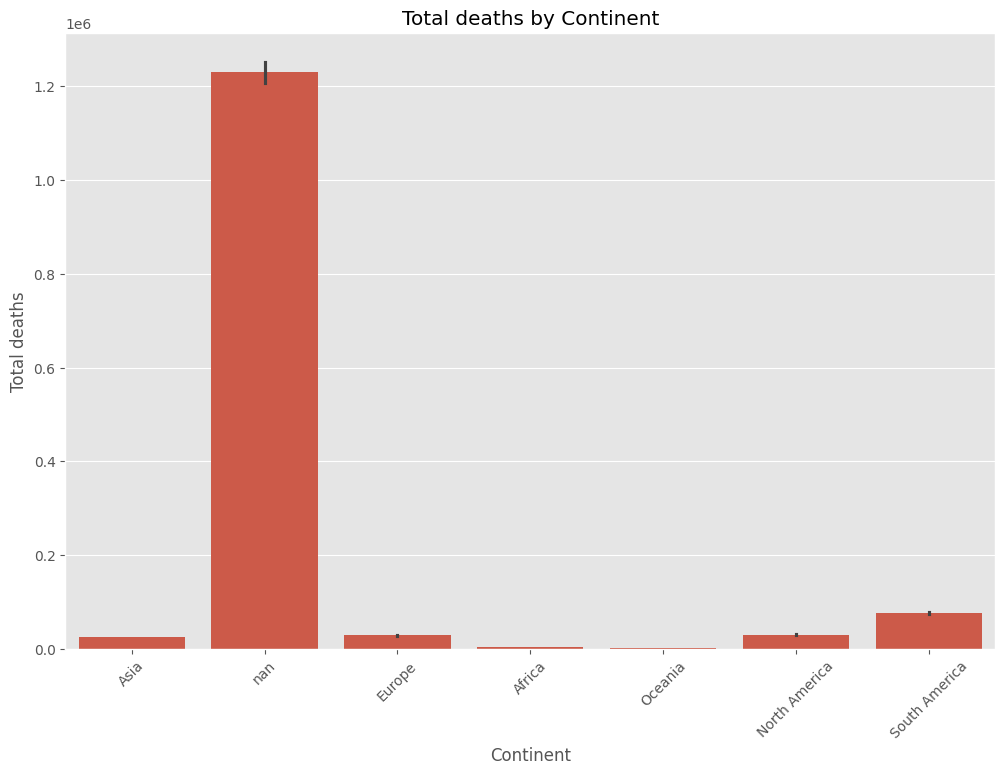

In [7]:

# Total number of deaths due to covid based on continent
sns.barplot(x='continent', y='total_deaths', data=df)
plt.title('Total deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Total deaths')
plt.xticks(rotation=45)
plt.show()


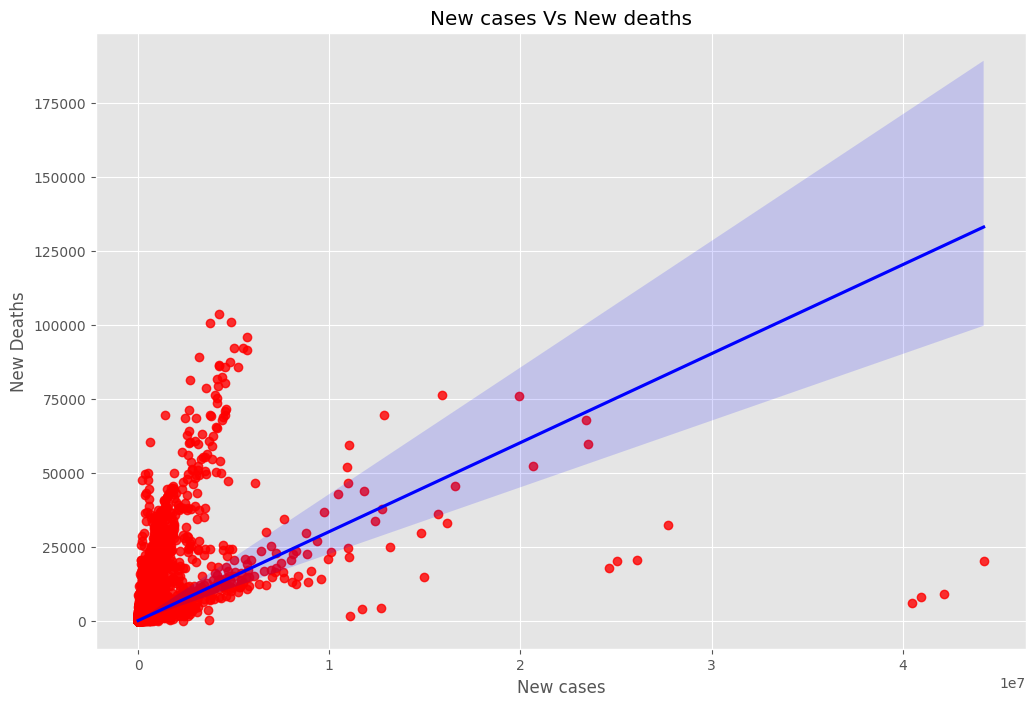

In [8]:
# Relation between new deaths and new cases

sns.regplot(x="new_cases",y="new_deaths",data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})
plt.title("New cases Vs New deaths")
plt.xlabel("New cases")
plt.ylabel("New Deaths")
plt.show()

In [9]:
# Determine the correlation between the data

correlation_data = df[['population', 'total_deaths',"total_cases_per_million","total_deaths_per_million","total_tests"]].copy()
correlation_data.corr(method="pearson")

,population,total_deaths,total_cases_per_million,total_deaths_per_million,total_tests
population,1.000000,0.750651,-0.075432,-0.057793,0.527631
total_deaths,0.750651,1.000000,0.021273,0.111273,0.772917
total_cases_per_million,-0.075432,0.021273,1.000000,0.556870,0.200530
total_deaths_per_million,-0.057793,0.111273,0.556870,1.000000,0.189285
total_tests,0.527631,0.772917,0.200530,0.189285,1.000000


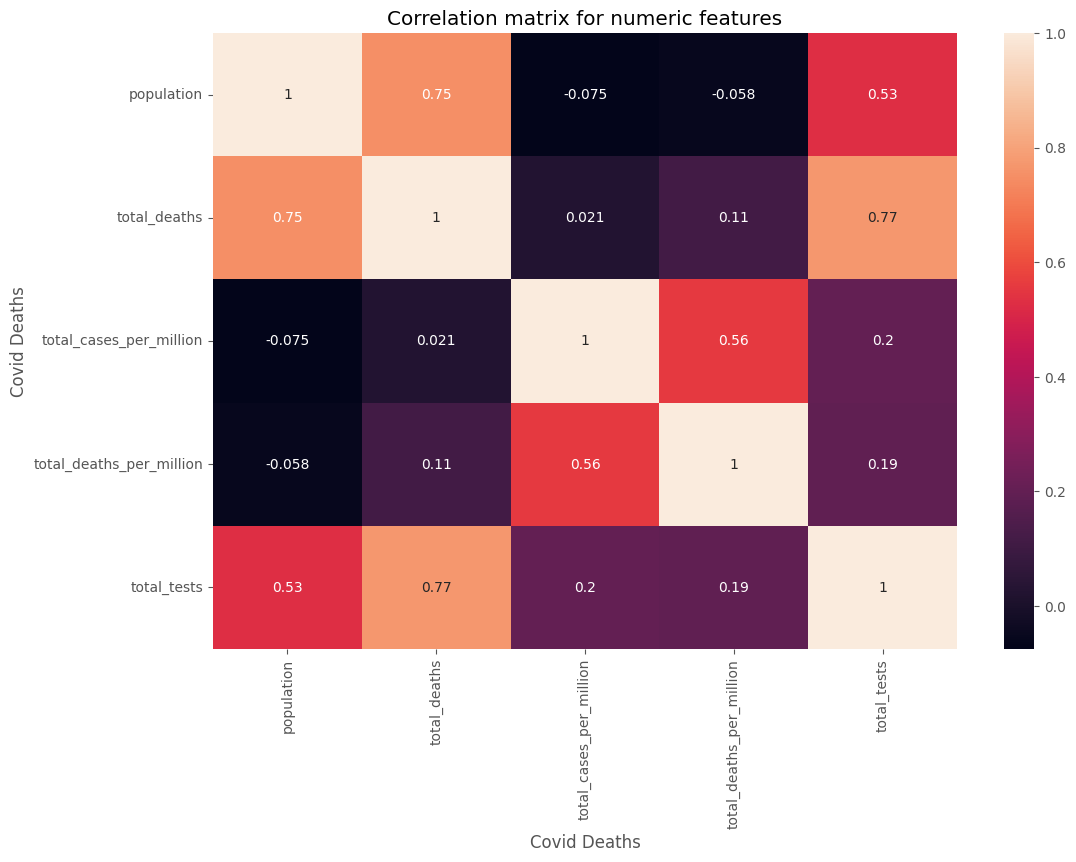

In [10]:
# Plot the correlation in heatmap

sns.heatmap(correlation_data.corr(method="pearson"),annot=True)
plt.title("Correlation matrix for numeric features")
plt.xlabel("Covid Deaths")
plt.ylabel("Covid Deaths")
plt.show()

In [11]:
# Numerize all fields in the dataframe for correlation matrix plot

df_numerized=df 
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=="object"):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes 

df_numerized

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,year
0,1,1,0,2020-01-05,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
1,1,1,0,2020-01-06,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
2,1,1,0,2020-01-07,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
3,1,1,0,2020-01-08,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
4,1,1,0,2020-01-09,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383943,254,0,254,2024-02-28,16320539,266355.0,0.0,0.714,5739.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
383944,254,0,254,2024-02-29,16320539,266355.0,0.0,0.714,5739.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
383945,254,0,254,2024-03-01,16320539,266355.0,0.0,0.714,5739.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
383946,254,0,254,2024-03-02,16320539,266355.0,0.0,0.714,5739.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024


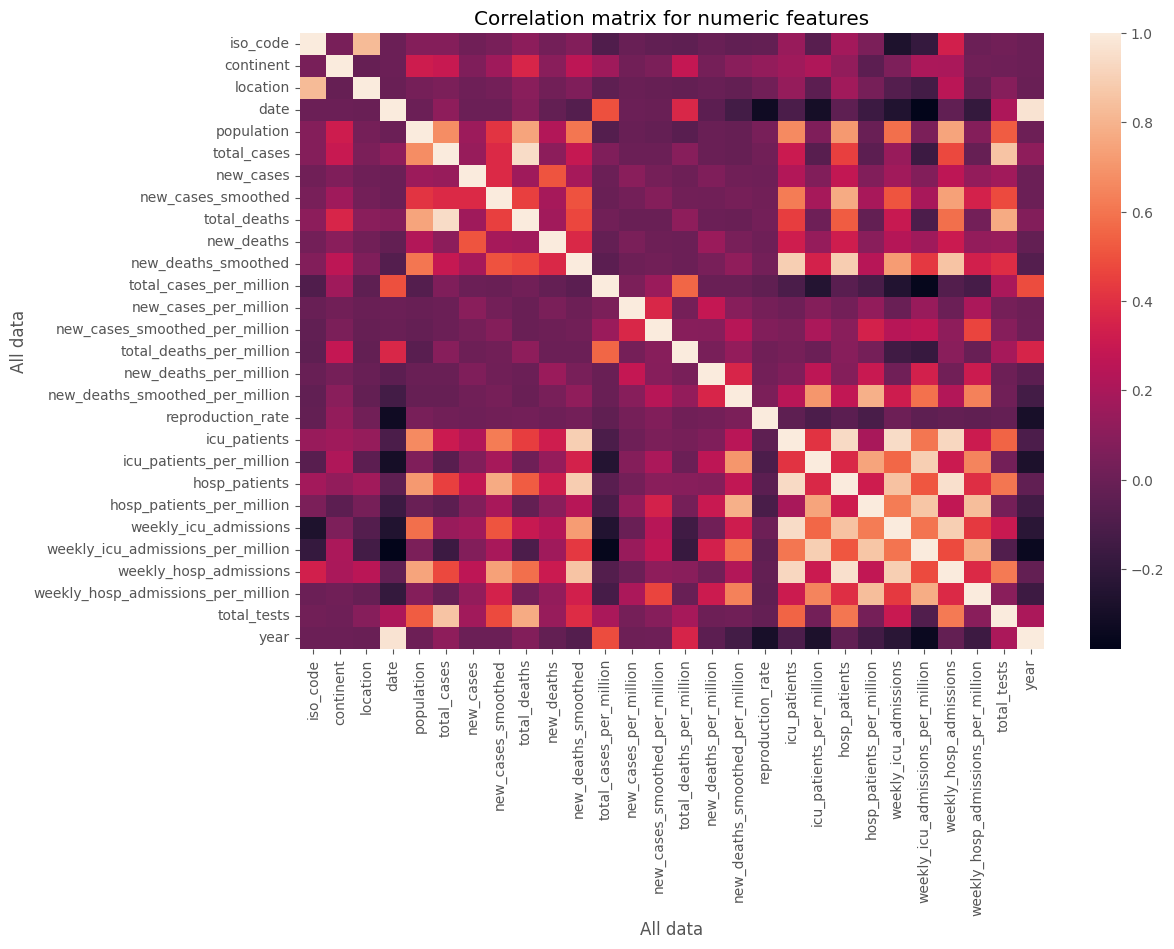

In [12]:
sns.heatmap(df_numerized.corr(method="pearson"))
plt.title("Correlation matrix for numeric features")
plt.xlabel("All data")
plt.ylabel("All data")
plt.show()

In [13]:
df_numerized.corr()

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,year
iso_code,1.000000,0.043385,0.826580,-0.001670,0.079436,0.082424,0.016244,0.043219,0.107810,0.027581,...,0.147548,-0.061835,0.176777,0.055860,-0.271154,-0.184556,0.337371,-0.001868,0.022086,-0.001780
continent,0.043385,1.000000,-0.015680,0.002060,0.318132,0.296128,0.063534,0.169044,0.361590,0.098912,...,0.165328,0.217991,0.122210,-0.045779,0.059568,0.208043,0.198632,0.017182,0.013220,0.002318
location,0.826580,-0.015680,1.000000,-0.002476,0.035098,0.056370,0.010388,0.027639,0.100406,0.025022,...,0.132886,-0.048383,0.171134,0.040797,-0.072391,-0.134918,0.256430,-0.013045,0.087255,-0.002532
date,-0.001670,0.002060,-0.002476,1.000000,0.003251,0.114781,-0.000609,-0.001526,0.079011,-0.027864,...,-0.107140,-0.302623,-0.041152,-0.162660,-0.256738,-0.378928,-0.033509,-0.188998,0.213289,0.970021
population,0.079436,0.318132,0.035098,0.003251,1.000000,0.673459,0.155416,0.413516,0.750651,0.226749,...,0.661654,0.066343,0.710452,-0.003542,0.580586,0.053307,0.749774,0.081865,0.527631,0.003686
total_cases,0.082424,0.296128,0.056370,0.114781,0.673459,1.000000,0.142158,0.377714,0.941872,0.109869,...,0.310019,-0.065209,0.446103,-0.047416,0.146421,-0.159055,0.472404,-0.015489,0.859256,0.112620
new_cases,0.016244,0.063534,0.010388,-0.000609,0.155416,0.142158,1.000000,0.376440,0.169106,0.505940,...,0.224831,0.070170,0.278387,0.069251,0.174959,0.075055,0.263921,0.130035,0.174599,0.000814
new_cases_smoothed,0.043219,0.169044,0.027639,-0.001526,0.413516,0.377714,0.376440,1.000000,0.449467,0.187405,...,0.622390,0.188849,0.770887,0.194109,0.507847,0.193203,0.740716,0.344735,0.479626,0.001966
total_deaths,0.107810,0.361590,0.100406,0.079011,0.750651,0.941872,0.169106,0.449467,1.000000,0.174885,...,0.442641,0.008928,0.530409,-0.028139,0.294886,-0.098854,0.581711,0.027000,0.772917,0.076957
new_deaths,0.027581,0.098912,0.025022,-0.027864,0.226749,0.109869,0.505940,0.187405,0.174885,1.000000,...,0.324739,0.132958,0.324475,0.095717,0.238046,0.168042,0.310202,0.132203,0.142660,-0.027238


In [14]:
# Compare each field to remaining field and get correlation data

correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

iso_code  iso_code                              1.000000
          continent                             0.043385
          location                              0.826580
          date                                 -0.001670
          population                            0.079436
                                                  ...   
year      weekly_icu_admissions_per_million    -0.338918
          weekly_hosp_admissions               -0.026134
          weekly_hosp_admissions_per_million   -0.157063
          total_tests                           0.202995
          year                                  1.000000
Length: 784, dtype: float64

<Axes: xlabel='year', ylabel='total_tests'>

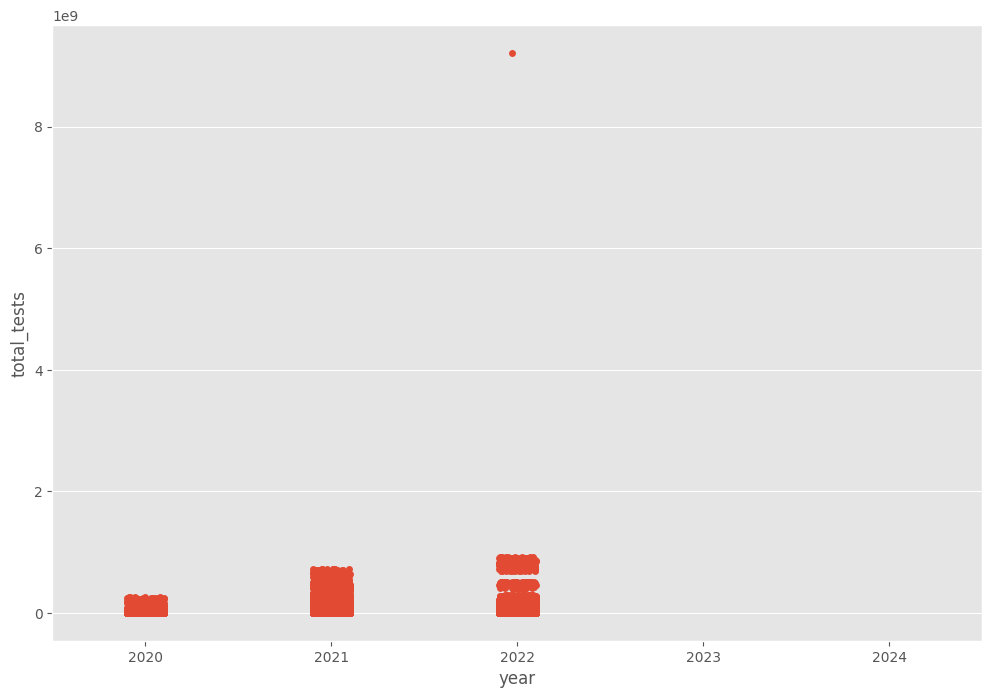

In [15]:

sns.stripplot(x="year", y="total_tests", data=df)


In [16]:
sns.swarmplot(x="year", y="total_deaths", data=df)
